## Conceptual

1.  h<sub>o</sub>: newspaper and sales have a relationship     will be rejected due to p > .05
    
    h<sub>o</sub>: TV and sales have a relationship           cannot reject due to p < .05
    
    h<sub>o</sub>: radio and sales have a relationship        cannot reject due to p < .05

    2. KNN classifier methods use the k nearest value to determine a classification of a test value. Basically the algortithm will find the Euclidian (easiest) distance between the K number of closes values and use this predicted value as the value for our test value. This value is compared with the other values in the region and creates a classification region. Whatever region our predicted value falls in is the classification for our test value.

    KNN regression used the same idea of Euclidian distance and gets values for tests. These values will form a line (typically not linear) that can be used to predict.

    3. (a) i:
    

(b)

In [1]:
def predY(coeffs, iq, gpa, gender):
    y = coeffs[0] + coeffs[1]*gpa + coeffs[2]*iq + coeffs[3]*gender + (gpa*iq)*coeffs[4] + (gpa*gender)*coeffs[5]
    return y

print(predY([50, 20, .07,35,.01,-10], 110, 4.0, 1))


137.1


(c) False it is more likely that there is a correlation between GPA and IQ. We must check the p value for whether or not there is any evidence.

4.
(a) for the training data I would assume training RSS to be less for the cubic as it is more flexible which produces less bias.
    
(b) The test RSS will be less for the linear regression because the relationship is know to be linear and linear regression should produce less variance than the cubic.
    
(c) Again the cubic training RSS to be less for similar reasons as above.
    
(d) Not 100% sure as we are not sure if the true relationship is closer to linear than non linear. More examination of linear and non linear regressions and the associated RSE and R<sup>2</sup> values.

## Applied

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/home/scot/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 8.

In [3]:
auto = pd.read_csv("../data/Auto.csv")
# remove row with horsepawer is unknown
auto = auto[auto.horsepower != "?"]
auto.horsepower = auto.horsepower.astype("int")
auto.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
from sklearn.linear_model import LinearRegression
X = auto.horsepower
y = auto.mpg
lm = LinearRegression()
lm.fit(X.values.reshape(-1, 1),y)
lm.score(X.values.reshape(-1, 1),y)
results = smf.ols('mpg ~ horsepower', data=auto).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 23 Jan 2018   Prob (F-statistic):           7.03e-81
Time:                        04:40:44   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) i: Yes there is a relationship as the F stat is way larger than 1 and the p values are significantly less than .05

ii: With an R<sup>2</sup> = .606 which means that 60.6% of the variance in y can be predicted with x.

iii: negative

iv:

In [7]:
print(results.params[0] + -0.171*98)
print(results.params[0] + -0.145*98)
lm.predict(98)

23.1778610212
25.7258610212


array([ 24.46707715])

### (b)

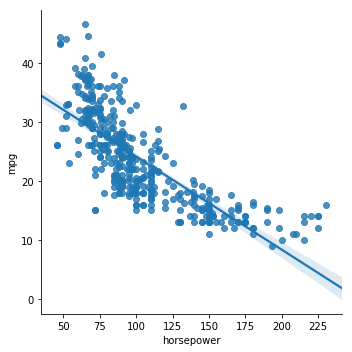

In [8]:
sns.lmplot("horsepower", "mpg", auto)

### 9

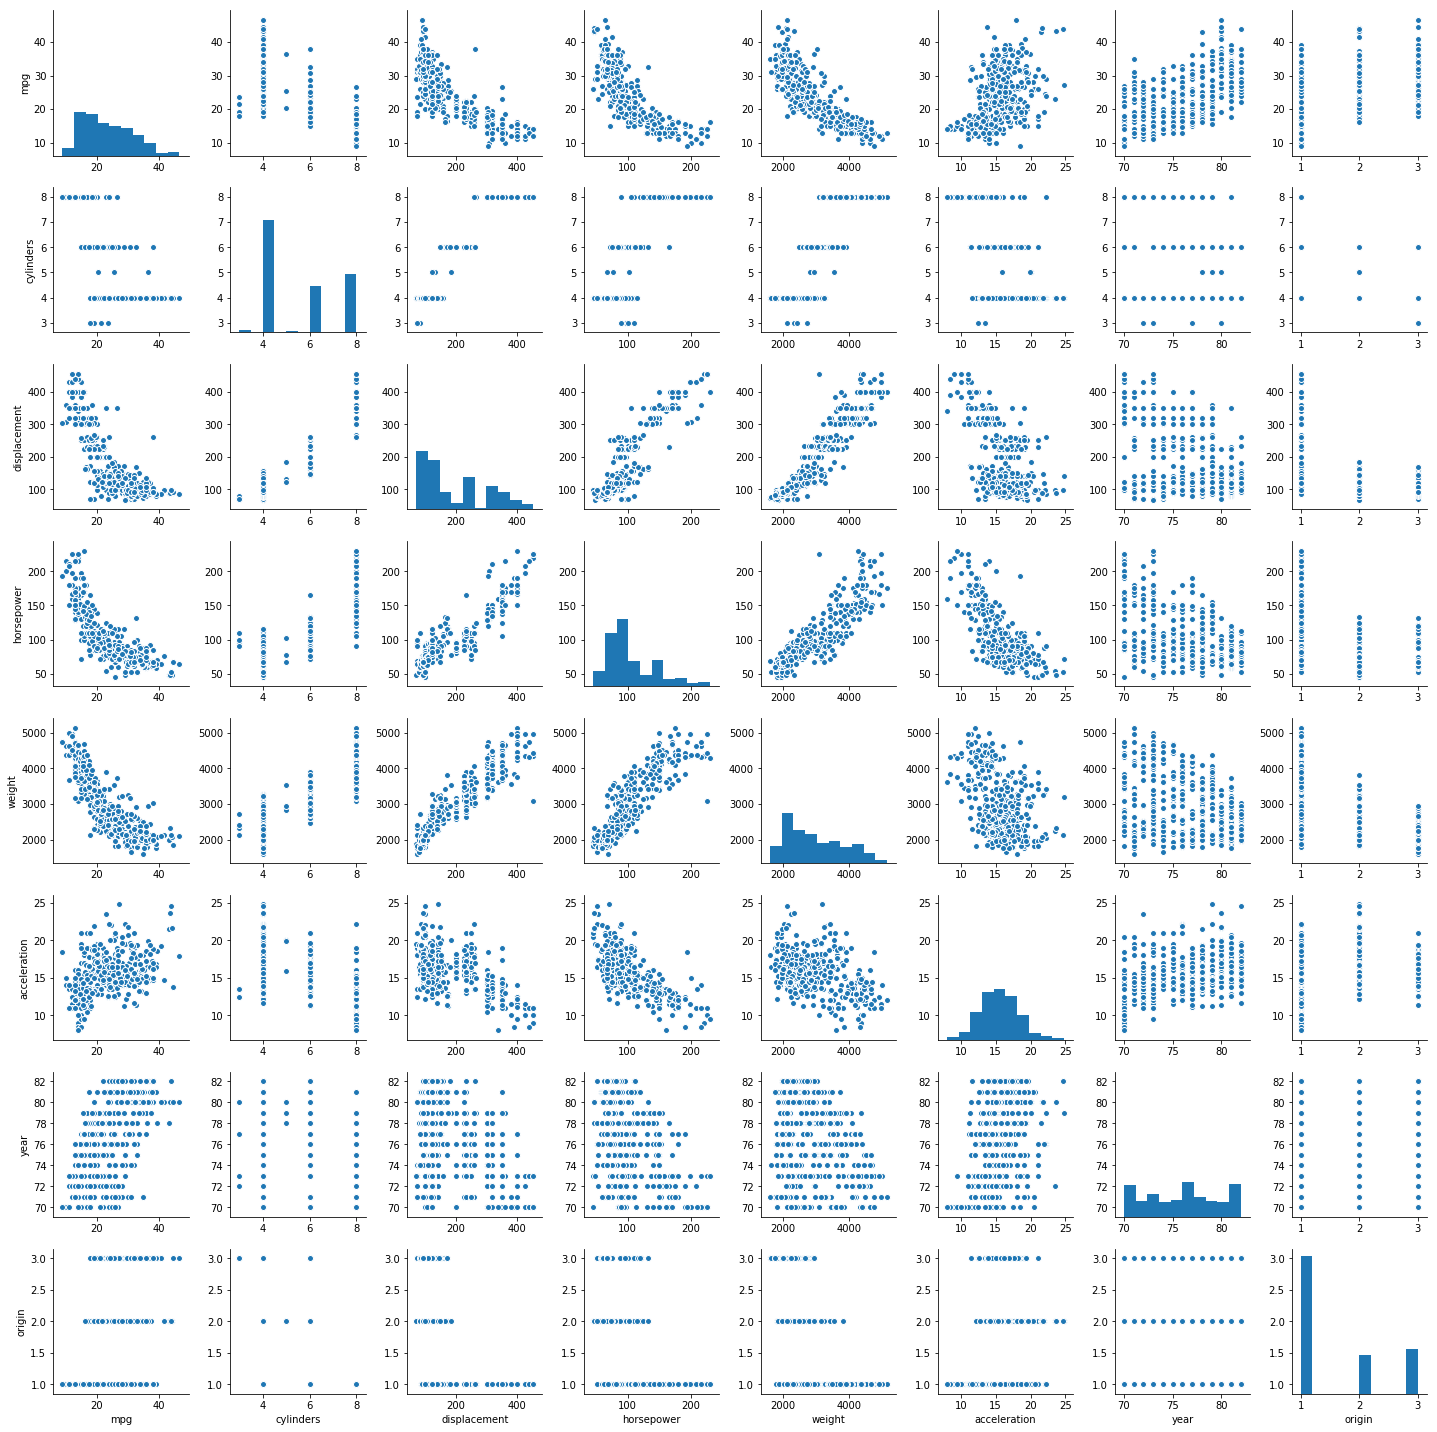

In [9]:
# (a)
sns.pairplot(auto)

In [13]:
# (b)
auto.iloc[:,:-1].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [17]:
# (c)
results = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 23 Jan 2018   Prob (F-statistic):          2.04e-139
Time:                        04:49:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**i and ii.)** It looks like displacement, weight, year and origin have significant relationships.

**iii.)** The coefficient for the year means that if everything else stayed the same that one year increase yields .75 mpg increase. That means the same care built one year later will have improved gas mileage.

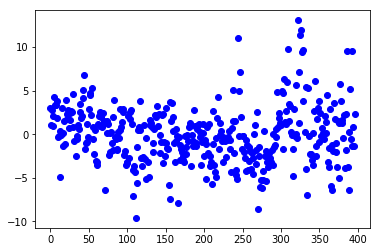

In [37]:
plt.plot(results.resid, 'bo')

     student_resid   unadj_p   bonf(p)
322       4.029537  0.000067  0.026431
326       3.690246  0.000257  0.100548
325       3.494823  0.000530  0.207715
244       3.390068  0.000771  0.302396
309       2.993291  0.002939  1.000000


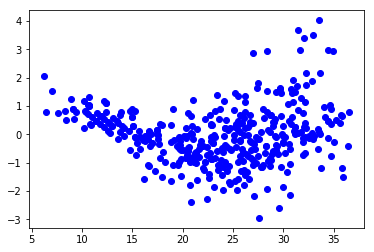

In [64]:
outliers = results.outlier_test()
stud_resid = outliers.student_resid
ypred = results.predict()
print(outliers.sort_values(by="student_resid", ascending=False).head())
plt.plot(ypred, stud_resid, 'bo')

It looks to me like there are 4 possible outliers 322,326,325,and 244